In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List all files and directories in the current working directory
print("\nFiles and directories in the current working directory:")
print(os.listdir('.'))


Current Working Directory: c:\LSBU\Semester 1\FIT\CW2

Files and directories in the current working directory:
['asd.txt', 'FIT_ML.ipynb', 'Health Monitor Dataset.xlsx', 'requirements.txt', 'venv']


In [3]:
data = pd.read_excel('Health Monitor Dataset.xlsx')


In [4]:
data

,Dehydration,Medicine Overdose,Acidious,Cold,Cough,Dehydration.1,Medicine Overdose.1,Acidious.1,Cold .1,Cough.1,Type,Temperature,Heart Rate,Pulse,BPSYS,BPDIA,Respiratory Rate,Oxygen Saturation,PH,Causes Respiratory Imbalance
0,True,False,False,False,False,1,0,0,0,0,1,98,93,67,90,74,12,0.994164,8,Mild
1,False,False,True,False,True,0,0,1,0,1,2,98,185,160,100,74,47,0.913976,13,Severe
2,False,True,True,False,True,0,1,1,0,1,3,103,126,194,97,47,42,0.932465,10,Chronic
3,True,False,False,False,False,1,0,0,0,0,1,98,92,69,91,60,16,0.999605,8,Mild
4,True,True,True,False,True,1,1,1,0,1,4,105,197,115,106,87,39,0.971081,13,Chronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,False,True,True,False,False,0,1,1,0,0,2,103,153,120,101,97,9,0.916403,4,Severe
4282,False,False,False,False,False,0,0,0,0,0,0,98,96,64,106,62,12,0.993931,8,Normal
4283,True,True,True,False,False,1,1,1,0,0,3,100,66,64,106,67,53,0.918334,6,Chronic
4284,True,False,True,True,True,1,0,1,1,1,4,97,145,188,106,67,8,0.922635,4,Chronic


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Dehydration                   4286 non-null   bool   
 1   Medicine Overdose             4286 non-null   bool   
 2   Acidious                      4286 non-null   bool   
 3   Cold                          4286 non-null   bool   
 4   Cough                         4286 non-null   bool   
 5   Dehydration.1                 4286 non-null   int64  
 6   Medicine Overdose.1           4286 non-null   int64  
 7   Acidious.1                    4286 non-null   int64  
 8   Cold .1                       4286 non-null   int64  
 9   Cough.1                       4286 non-null   int64  
 10  Type                          4286 non-null   int64  
 11  Temperature                   4286 non-null   int64  
 12  Heart Rate                    4286 non-null   int64  
 13  Pul

In [6]:
data.isnull().sum()

Dehydration                     0
Medicine Overdose               0
Acidious                        0
Cold                            0
Cough                           0
Dehydration.1                   0
Medicine Overdose.1             0
Acidious.1                      0
Cold .1                         0
Cough.1                         0
Type                            0
Temperature                     0
Heart Rate                      0
Pulse                           0
BPSYS                           0
BPDIA                           0
Respiratory Rate                0
Oxygen Saturation               0
PH                              0
Causes Respiratory Imbalance    0
dtype: int64

In [7]:
data['Causes Respiratory Imbalance'].value_counts()

Causes Respiratory Imbalance
Chronic    2085
Severe     1362
Mild        689
Normal      150
Name: count, dtype: int64

In [8]:
data.shape

(4286, 20)

In [9]:
X = data.drop('Causes Respiratory Imbalance',axis=1)
X

,Dehydration,Medicine Overdose,Acidious,Cold,Cough,Dehydration.1,Medicine Overdose.1,Acidious.1,Cold .1,Cough.1,Type,Temperature,Heart Rate,Pulse,BPSYS,BPDIA,Respiratory Rate,Oxygen Saturation,PH
0,True,False,False,False,False,1,0,0,0,0,1,98,93,67,90,74,12,0.994164,8
1,False,False,True,False,True,0,0,1,0,1,2,98,185,160,100,74,47,0.913976,13
2,False,True,True,False,True,0,1,1,0,1,3,103,126,194,97,47,42,0.932465,10
3,True,False,False,False,False,1,0,0,0,0,1,98,92,69,91,60,16,0.999605,8
4,True,True,True,False,True,1,1,1,0,1,4,105,197,115,106,87,39,0.971081,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,False,True,True,False,False,0,1,1,0,0,2,103,153,120,101,97,9,0.916403,4
4282,False,False,False,False,False,0,0,0,0,0,0,98,96,64,106,62,12,0.993931,8
4283,True,True,True,False,False,1,1,1,0,0,3,100,66,64,106,67,53,0.918334,6
4284,True,False,True,True,True,1,0,1,1,1,4,97,145,188,106,67,8,0.922635,4


In [10]:
Y = data['Causes Respiratory Imbalance']
Y

0          Mild
1        Severe
2       Chronic
3          Mild
4       Chronic
         ...   
4281     Severe
4282     Normal
4283    Chronic
4284    Chronic
4285    Chronic
Name: Causes Respiratory Imbalance, Length: 4286, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 =  train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR_Algorithm = LogisticRegression()
LR_Algorithm.fit(x_train1, y_train1)
LR_Algorithm_Prediction = LR_Algorithm.predict(x_test1)
Accuracy_LR = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Logistic Regression Algorithm', Accuracy_LR)

Accuracy of Logistic Regression Algorithm 0.9417249417249417


              precision    recall  f1-score   support

     Chronic       1.00      0.98      0.99       394
        Mild       0.83      0.92      0.88       152
      Normal       0.00      0.00      0.00        26
      Severe       0.94      0.98      0.96       286

    accuracy                           0.94       858
   macro avg       0.69      0.72      0.71       858
weighted avg       0.92      0.94      0.93       858



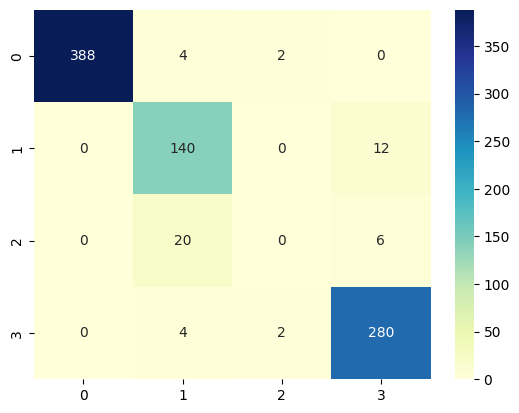

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
CM_LR=confusion_matrix(y_test1, LR_Algorithm_Prediction)
sns.heatmap(CM_LR, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, LR_Algorithm_Prediction))

In [18]:
print(LR_Algorithm_Prediction)

['Severe' 'Severe' 'Chronic' 'Mild' 'Mild' 'Chronic' 'Chronic' 'Chronic'
 'Chronic' 'Severe' 'Severe' 'Mild' 'Severe' 'Severe' 'Chronic' 'Chronic'
 'Chronic' 'Mild' 'Chronic' 'Chronic' 'Chronic' 'Chronic' 'Mild' 'Severe'
 'Mild' 'Severe' 'Mild' 'Severe' 'Mild' 'Mild' 'Severe' 'Chronic' 'Severe'
 'Chronic' 'Chronic' 'Severe' 'Chronic' 'Chronic' 'Chronic' 'Mild'
 'Chronic' 'Severe' 'Severe' 'Severe' 'Severe' 'Chronic' 'Chronic'
 'Chronic' 'Severe' 'Mild' 'Mild' 'Severe' 'Chronic' 'Severe' 'Severe'
 'Severe' 'Chronic' 'Chronic' 'Mild' 'Mild' 'Severe' 'Severe' 'Chronic'
 'Chronic' 'Severe' 'Chronic' 'Mild' 'Chronic' 'Mild' 'Mild' 'Severe'
 'Severe' 'Severe' 'Chronic' 'Chronic' 'Chronic' 'Chronic' 'Severe'
 'Chronic' 'Chronic' 'Chronic' 'Mild' 'Severe' 'Severe' 'Severe' 'Chronic'
 'Chronic' 'Chronic' 'Chronic' 'Chronic' 'Chronic' 'Mild' 'Severe' 'Mild'
 'Severe' 'Chronic' 'Severe' 'Chronic' 'Chronic' 'Chronic' 'Mild' 'Mild'
 'Chronic' 'Severe' 'Severe' 'Chronic' 'Chronic' 'Chronic' 'Severe'

In [33]:
import pickle
pickle.dump(LR_Algorithm, open('LR_Algorithm.pkl', 'wb'))

In [46]:
LR_Algorithm= pickle.load(open('LR_Algorithm.pkl', 'rb'))
data_1 = np.array([[True, False, False, False, False, 1, 0, 0, 0, 0, 4, 98, 93, 67, 90, 74, 12, 0.99, 8]])
data_2=np.array([[False, False, True, False, True , 0, 0, 1, 0, 1, 2, 98, 185, 160, 100 ,74, 47, 0.91, 13]])

print(LR_Algorithm.predict(data_2))

['Severe']
